Las distintas columnas que aparecen corresponden a: 
* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **Salary**: a predecir

# 1. Preparación de Datos

In [2]:
# Librerias
import numpy as np  # Trabajar con matrices
import pandas as pd # Trabajar con ccsv, tablas, como si fueran SQL

import matplotlib.pyplot as plt # para visualizaciones
import seaborn as sns           # visualizaciones más elegantes.

import scipy.stats as stats     # Calculos estadisticos que no proporciona numpy

In [3]:
names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
        'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']

In [4]:
# Carga el dataset
dataset_mat = pd.read_csv('adult.data.txt', header = None) # Carga el archivo en un dataframe
dataset_test = pd.read_csv('adult.test.txt', header = None, skiprows = 1) # Carga el archivo en un dataframe
dataset_mat.columns = names
dataset_test.columns = names

# Visualizar el contenido de los datos
#dataset_mat.head() #muestra las 5 primeras lineas datos

# EDA (Analisis de Datos)

Text(0.5, 1.0, 'Distribución por Salario Test')

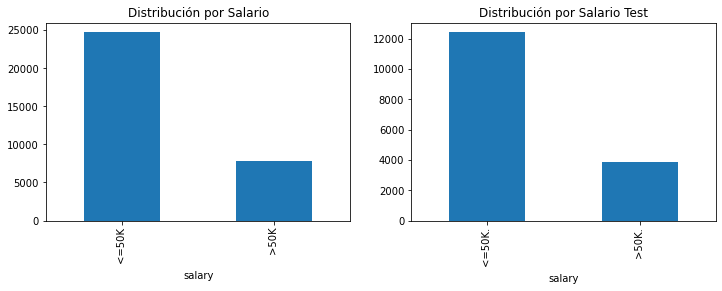

In [9]:
fig = plt.figure(figsize =  (12,8))
plt.subplot(2, 2, 1)
GrupoSalario = dataset_mat.groupby(['salary']).size()
GrupoSalario.plot.bar()
plt.title("Distribución por Salario")
plt.subplot(2, 2, 2)
GrupoTSalario = dataset_test.groupby(['salary']).size()
GrupoTSalario.plot.bar()
plt.title("Distribución por Salario - Test")


Text(0.5, 1.0, 'Distribución por edad - Test')

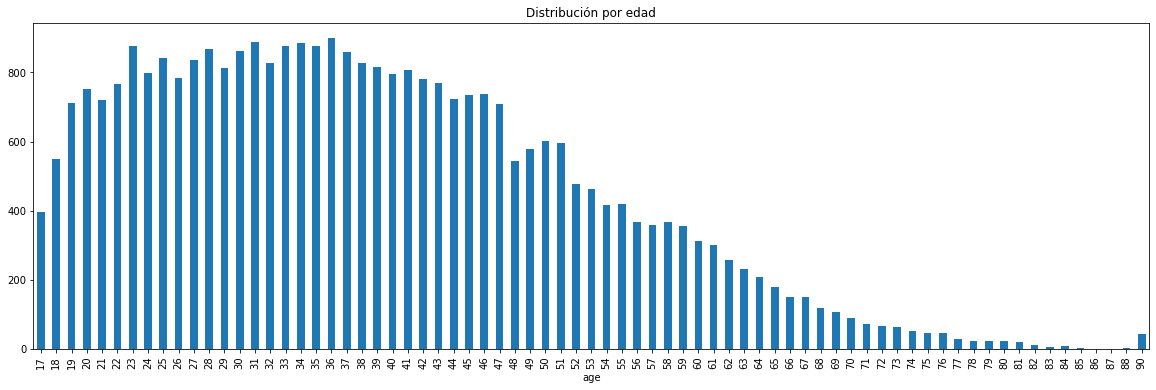

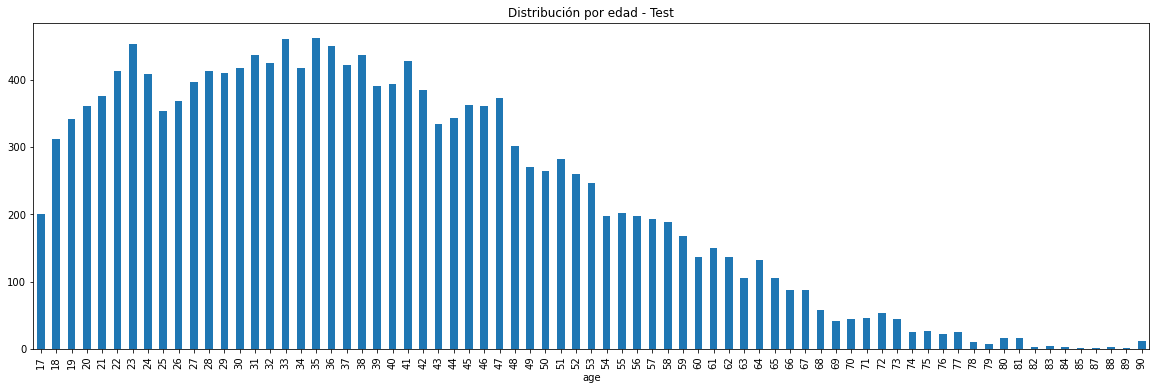

In [13]:
fig = plt.figure(figsize = (20,6))
GrupoEdad = dataset_mat.groupby(['age']).size()
GrupoEdad.plot.bar()
plt.title("Distribución por edad")
fig = plt.figure(figsize = (20,6))
GrupoTEdad = dataset_test.groupby(['age']).size()
GrupoTEdad.plot.bar()
plt.title("Distribución por edad - Test")

La característica de edad describe la edad del individuo. Primero se muestra la distribución de edad de nuestro conjunto de datos. Las edades oscilan entre los 17 y los 90 años de edad, con la mayoría de las entradas entre las edades de 25 y 50 años. 

# Gráficos de *"features"*

Text(0.5, 1.0, 'Distribución por clase de trabajo - test')

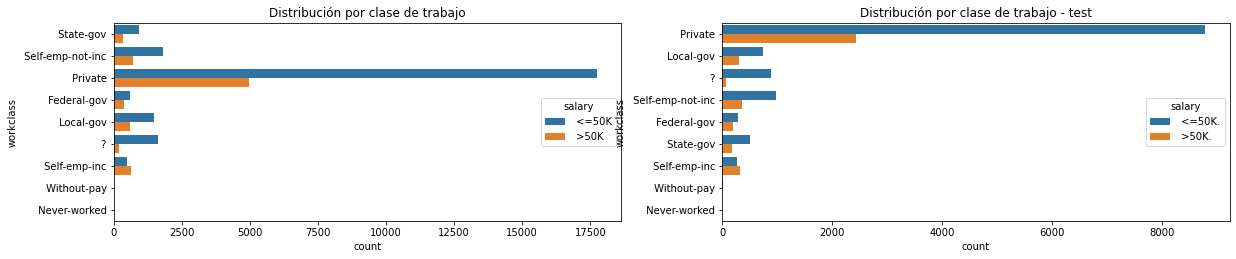

In [17]:
fig = plt.figure(figsize =  (20,8))
plt.subplot(2, 2, 1)
sns.countplot(y='workclass', hue = 'salary', data = dataset_mat, )
plt.title("Distribución por clase de trabajo")
plt.subplot(2, 2, 2)
sns.countplot(y='workclass', hue = 'salary', data = dataset_test, )
plt.title("Distribución por clase de trabajo - test")
#plt.tight_layout()

Text(0.5, 1.0, 'Distribución por Educación - test')

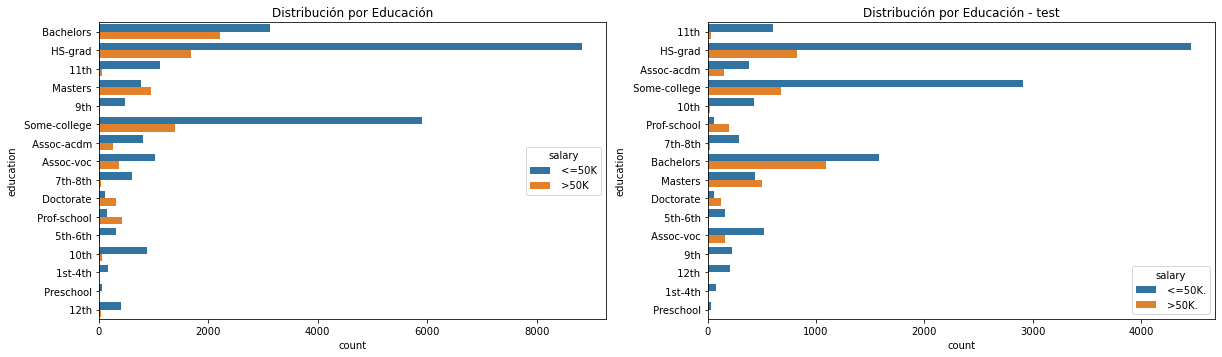

In [19]:
fig = plt.figure(figsize =  (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='education', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Educación")
plt.subplot(2, 2, 2)
sns.countplot(y='education', hue = 'salary', data = dataset_test)
plt.title("Distribución por Educación - test")
#plt.tight_layout()

La característica **education** describe el nivel de educación de cada individuo en el conjunto de datos. Los gráfico muestra la distribución de los diferentes niveles de educación. La mayoría tienen como mucho educación secundaria, mientras que sólo una pequeña parte tiene un doctorado.
En su mayoría un nivel alto de educación se correlaciona con un mayor porcentaje de individuos con la etiqueta >50k. Una referencia interesante es la proporción de individuos etiquetados >50k a <=50k, es casi la misma entre los que tienen un doctorado y los que fueron a una escuela profesional (Profschool)

Text(0.5, 1.0, 'Distribución por Estado civil - test')

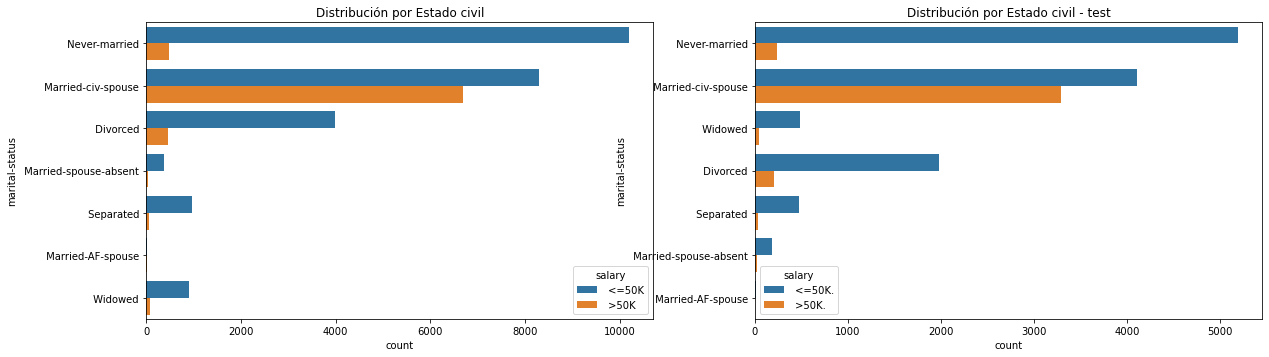

In [20]:
fig = plt.figure(figsize =  (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='marital-status', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Estado civil")
plt.subplot(2, 2, 2)
sns.countplot(y='marital-status', hue = 'salary', data = dataset_test)
plt.title("Distribución por Estado civil - test")
#plt.tight_layout()

Text(0.5, 1.0, 'Distribución por Ocupación - test')

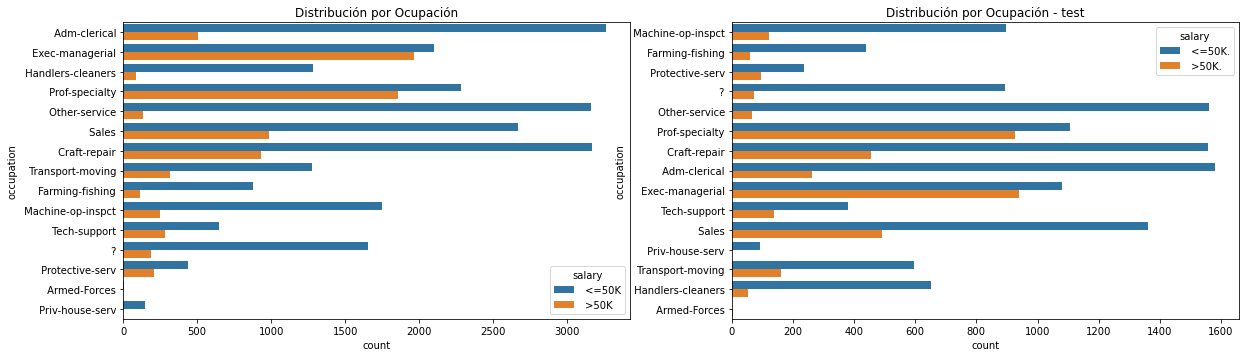

In [21]:
fig = plt.figure(figsize = (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='occupation', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ocupación")
plt.subplot(2, 2, 2)
sns.countplot(y='occupation', hue = 'salary', data = dataset_test)
plt.title("Distribución por Ocupación - test")

Como se observa en los gráficos, hay una distribución algo uniforme de las ocupaciones en el conjunto de datos, sin tener en cuenta la ausencia de las armed-forces. Sin embargo, exec-gerencial y prof-specialty destacan por tener porcentajes muy altos de individuos que superan los $50.000. Además, los porcentajes para la farming-fishing, otherservice y Handlers-cleaners son significativamente más bajos que el resto de la distribución. Hay que resaltar que hay atos para una ocupación desconocida **(?)**

Text(0.5, 1.0, 'Distribución por Relación - test')

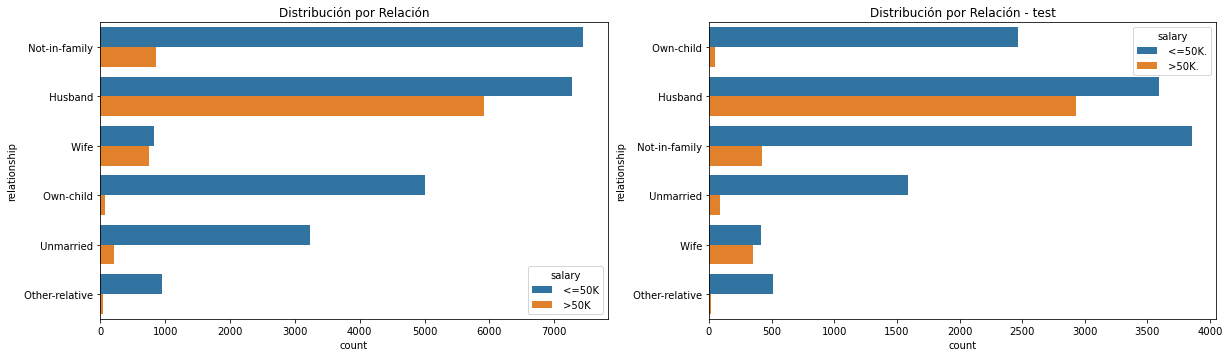

In [22]:
fig = plt.figure(figsize =  (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='relationship', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Relación")
plt.subplot(2, 2, 2)
sns.countplot(y='relationship', hue = 'salary', data = dataset_test)
plt.title("Distribución por Relación - test")

Text(0.5, 1.0, 'Distribución por Raza - test')

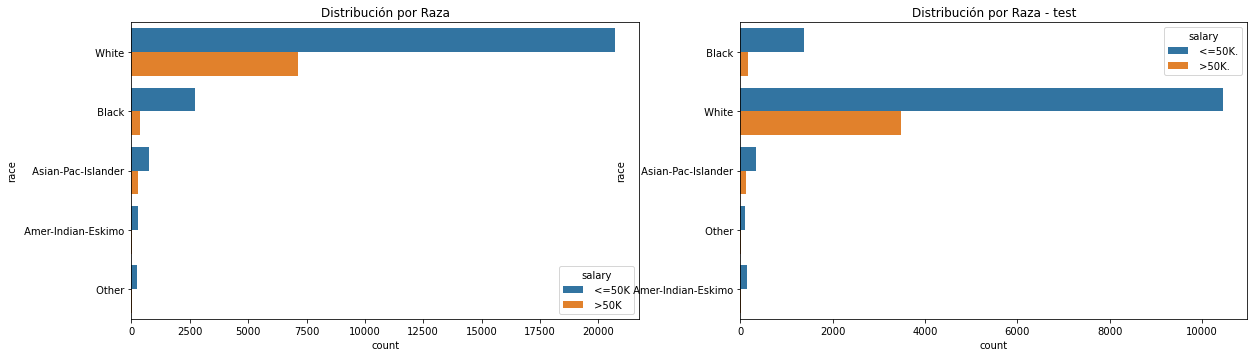

In [23]:
fig = plt.figure(figsize = (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='race', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Raza")
plt.subplot(2, 2, 2)
sns.countplot(y='race', hue = 'salary', data = dataset_test)
plt.title("Distribución por Raza - test")

En los graficos parece que esta caracteristica podría ser útil en el modelo de predicción, ya que los blancos, negros y asiáticos tienen un porcentaje mayor de entradas superiores a 50.000 dólares que el resto de razas. Sin embargo, el tamaño de la muestra de blancos en el conjunto de datos es desproporcionadamente grande en comparación con todas las demás razas. El segundo grupo más representado son los negros con menos de 5000 entradas. **La falta de distribución equitativa hizo que se considerara no utilizar este atributo en el modelo.**

Text(0.5, 1.0, 'Distribución por Sexo - test')

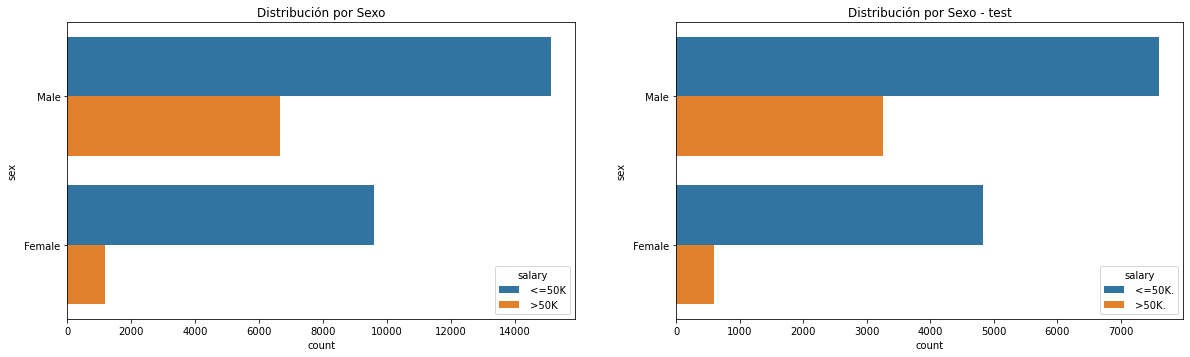

In [25]:
fig = plt.figure(figsize =  (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='sex', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Sexo")
plt.subplot(2, 2, 2)
sns.countplot(y='sex', hue = 'salary', data = dataset_test)
plt.title("Distribución por Sexo - test")

Se puede ver que hay casi el doble del tamaño de la muestra de hombres en comparación con las mujeres en el conjunto de datos. Si bien esto puede no afectar demasiado las predicciones, la distribución del ingreso sí puede hacerlo. Como se aprecia el porcentaje de hombres que ganan más de $ 50,000 es mucho mayor que el porcentaje de mujeres que ganan la misma cantidad. **Este será sin duda un factor significativo y debería ser una característica considerada en el modelo de predicción.**

Text(0.5, 1.0, 'Distribución por Ciudad natal - test')

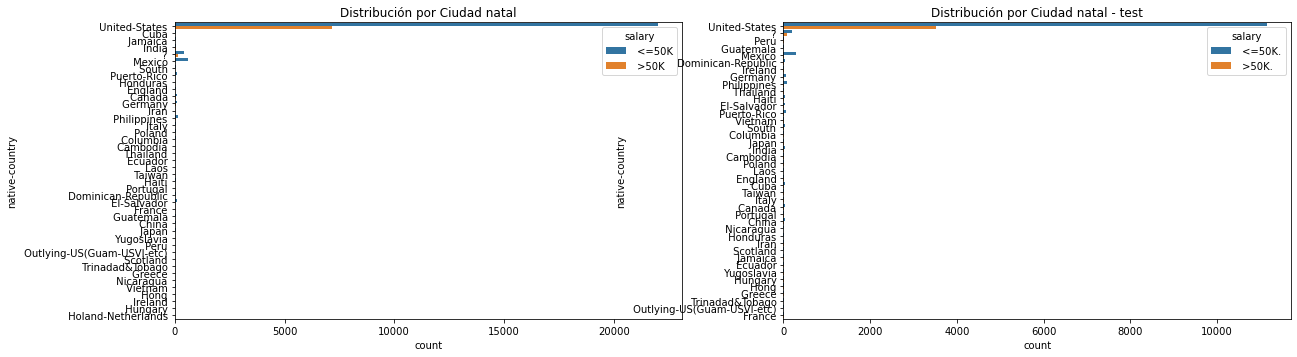

In [26]:
fig = plt.figure(figsize =  (20,12))
plt.subplot(2, 2, 1)
sns.countplot(y='native-country', hue = 'salary', data = dataset_mat)
plt.title("Distribución por Ciudad natal")
plt.subplot(2, 2, 2)
sns.countplot(y='native-country', hue = 'salary', data = dataset_test)
plt.title("Distribución por Ciudad natal - test")

Feature que aporta poco ya que esta totalmente sesgado hacia un solo país.

Text(0.5, 1.0, 'Distribución por horas por semana - test')

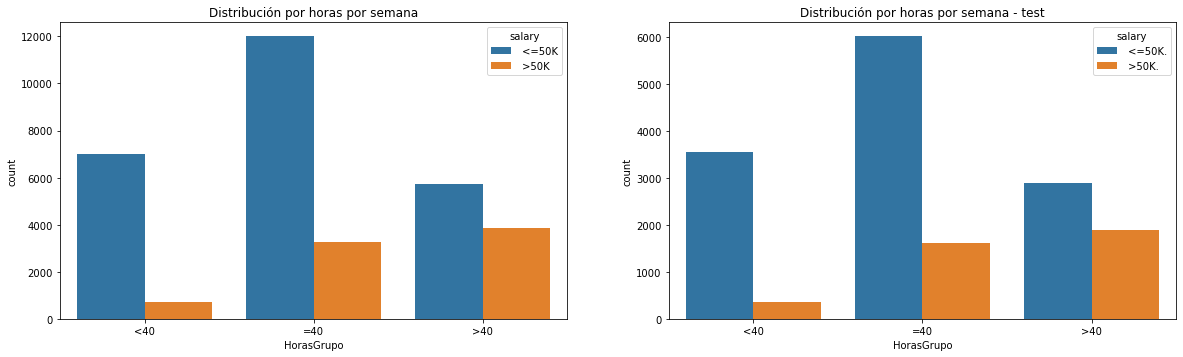

In [29]:
fig = plt.figure(figsize =  (20,12))
bins= [0,39,41,110]
labels = ['<40','=40','>40']
dataset_mat['HorasGrupo'] = pd.cut(dataset_mat['hours-per-week'], bins=bins, labels=labels, right=False)
dataset_test['HorasGrupo'] = pd.cut(dataset_test['hours-per-week'], bins=bins, labels=labels, right=False)
plt.subplot(2, 2, 1)
sns.countplot(x='HorasGrupo', hue = 'salary', data = dataset_mat)
plt.title("Distribución por horas por semana")
plt.subplot(2, 2, 2)
sns.countplot(x='HorasGrupo', hue = 'salary', data = dataset_test)
plt.title("Distribución por horas por semana - test")

Al observar la distribución de los graficos, la gran mayoría de las personas trabajan 40 horas a la semana. Independientemente de la distribución no uniforme; ademas se muestra que el porcentaje de personas que ganan más de $ 50 000 es similar entre los individuos que trabajan 40 horas o más. Sin embargo, el que trabaja menos de 40 horas se le disminuye drásticamente la oportunidad de ganar más de 50 mil.

# Llena y elimina los valores malos y pérdidos

**Eliminación de muestras**
Cuando se probaron algunos modelos, hubo problemas para crear valores predeterminados para muchas de las muestras con valores desconocidos o faltantes, lo que provocó errores en el cálculo y resultados sesgados. Se eliminará cualquier muestra de datos que tuviera un valor faltante para mejorar los resultados.

**Eliminación de features**
También se opto por no utilizar las caracteristicas: "fnlwgt", "relationship" y "capital Gains/Loss". Estas características no parecen útiles para el análisis o tenían demasiados datos incorrectos, como, valores cero, valores desconocidos / privados.

In [32]:
dataset_mat.isnull().sum()
# Cuenta los valores extraños en las columnas
for col in dataset_mat.columns:
    if dataset_mat[col].dtype == object:
        print(col, dataset_mat[col].str.contains(' \?').sum())

workclass 1836
education 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
native-country 583
salary 0


In [33]:
dataset_test.isnull().sum()
# Cuenta los valores extraños en las columnas
for col in dataset_test.columns:
    if dataset_test[col].dtype == object:
        print(col, dataset_test[col].str.contains(' \?').sum()) 

workclass 963
education 0
marital-status 0
occupation 966
relationship 0
race 0
sex 0
native-country 274
salary 0


In [34]:
# Define una variable con las columnas con valores extraños
columns_with_na_vals = ['workclass', 'occupation', 'native-country']

In [35]:
# Reemplazar los valores extraños
for col in columns_with_na_vals:
    dataset_mat[col] = (dataset_mat[col].replace(to_replace = ' ?', value = np.nan))
    
for col in columns_with_na_vals:
    dataset_test[col] = (dataset_test[col].replace(to_replace = ' ?', value = np.nan))    
    
# Corrobora la no existencia de valores extraños
for col in dataset_mat.columns:
    if dataset_mat[col].dtype == object:
        print(col, dataset_mat[col].str.contains(' \?').sum())
        
for col in dataset_test.columns:
    if dataset_test[col].dtype == object:
        print(col, dataset_test[col].str.contains(' \?').sum()) 

workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
salary 0
workclass 0
education 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0
salary 0


In [36]:
# Borra valor impropios
dataset_mat = dataset_mat.dropna()
dataset_test = dataset_test.dropna()

In [37]:
dataset_mat_stats_df = dataset_mat.describe().T
# Calculamos la asimetría
skew_values = list()
for num_col in dataset_mat_stats_df.index:
    num_col_skew = stats.skew(dataset_mat[num_col])
    skew_values.append(num_col_skew)
dataset_mat_stats_df['skew'] = skew_values
dataset_mat_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0,0.530201
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0,1.459147
education-num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0,-0.305363
capital-gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0,11.902090
capital-loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0,4.526155
hours-per-week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0,0.330853


In [39]:
dataset_test_stats_df = dataset_test.describe().T
# Calculamos la asimetría
skew_values = list()
for num_col in dataset_test_stats_df.index:
    num_col_skew = stats.skew(dataset_test[num_col])
    skew_values.append(num_col_skew)
dataset_test_stats_df['skew'] = skew_values
dataset_test_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.00,90.0,0.536058
fnlwgt,15060.0,189616.370252,105615.006523,13492.0,116655.0,177955.0,238588.75,1490400.0,1.424051
education-num,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.00,16.0,-0.320967
capital-gain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.00,99999.0,11.569004
capital-loss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.00,3770.0,4.496291
hours-per-week,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.00,99.0,0.359466


# Gráficos de las distribuciones de las features numéricas no categóricas

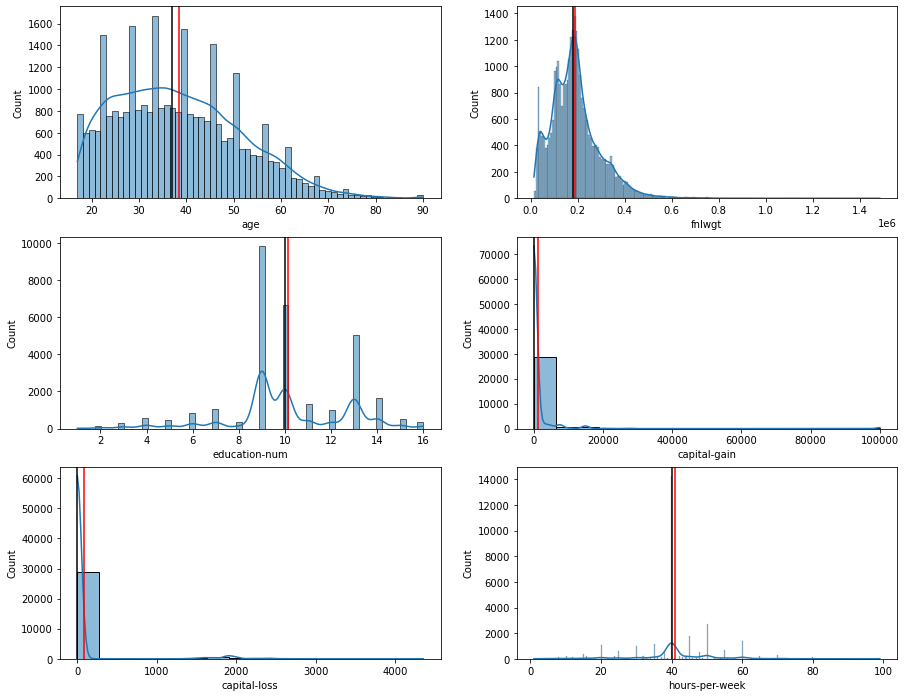

In [45]:
# Histograma para representar la evolución de las variables
fig = plt.figure(figsize=(15,12))

for i, num_col in enumerate(dataset_mat_stats_df.index):
    fig.add_subplot(3,2,1+i)
    sns.histplot(x=dataset_mat[num_col], kde=True)
    
    mean_value = dataset_mat[num_col].mean()  # Media
    plt.axvline(x=mean_value, c='red')
    
    median_value = dataset_mat[num_col].median() # Mediana
    plt.axvline(x=median_value, c='black')

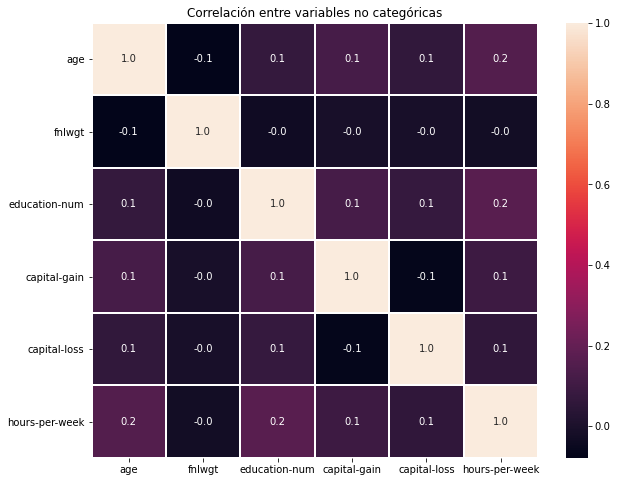

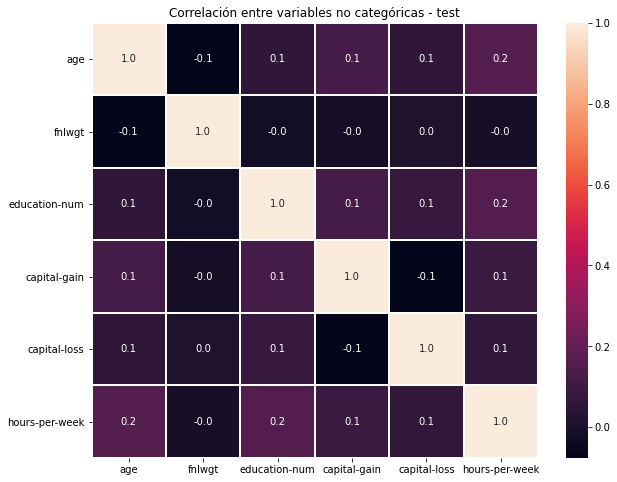

In [53]:
# Correlación entre variables no categoricas
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(dataset_mat.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.title('Correlación entre variables no categóricas')
#sns.heatmap(dataset_test.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(dataset_test.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.title('Correlación entre variables no categóricas - test')
plt.show()

In [54]:
list_mult_not_ord = ['workclass', 'education', 'marital-status', 'occupation',
                    'sex','native-country'] #Lista de variable categoricas o ordinales

In [55]:
# Encoding numerico de las variables para trabajar en el modelo
# Hay que transformar a numéricas las variables categóricas para poder trabajar con ellas
# Las variables que aparecen como texto aparecen como object
#dataset_mat.info() #displiega informacion de la columnas dle dataframe
# copiamos en un sub-dataframe los registros cuyo tipo = object
obj_df = dataset_mat.select_dtypes(include=['object']).copy()
#print (obj_df.columns) # despliega las columnas creado en la línea anterior.

from sklearn.preprocessing import LabelEncoder # Esta libreria con proprocessing permite expresar los valores texto en numeros
lb_encoder = LabelEncoder() # creamos un objeto que hará el encoding

# Iterar por las columnas del dataframe
for col in obj_df.columns:
    dataset_mat[col] = lb_encoder.fit_transform(dataset_mat[col]) 
# Sustituimos en el dataframe origimal el valor de texto
# por el valor numerico con fit_transform

# Lo hacemos para el grupo de test
obj_test = dataset_test.select_dtypes(include=['object']).copy()

for col in obj_test.columns:
    dataset_test[col] = lb_encoder.fit_transform(dataset_test[col]) 

#dataset_mat.head()
#dataset_mat.isnull().sum() #Permite chequear si hay alguna variable con nulos.
#dataset_test.isnull().sum() #Permite chequear si hay alguna variable con nulos.

<AxesSubplot:ylabel='native-country'>

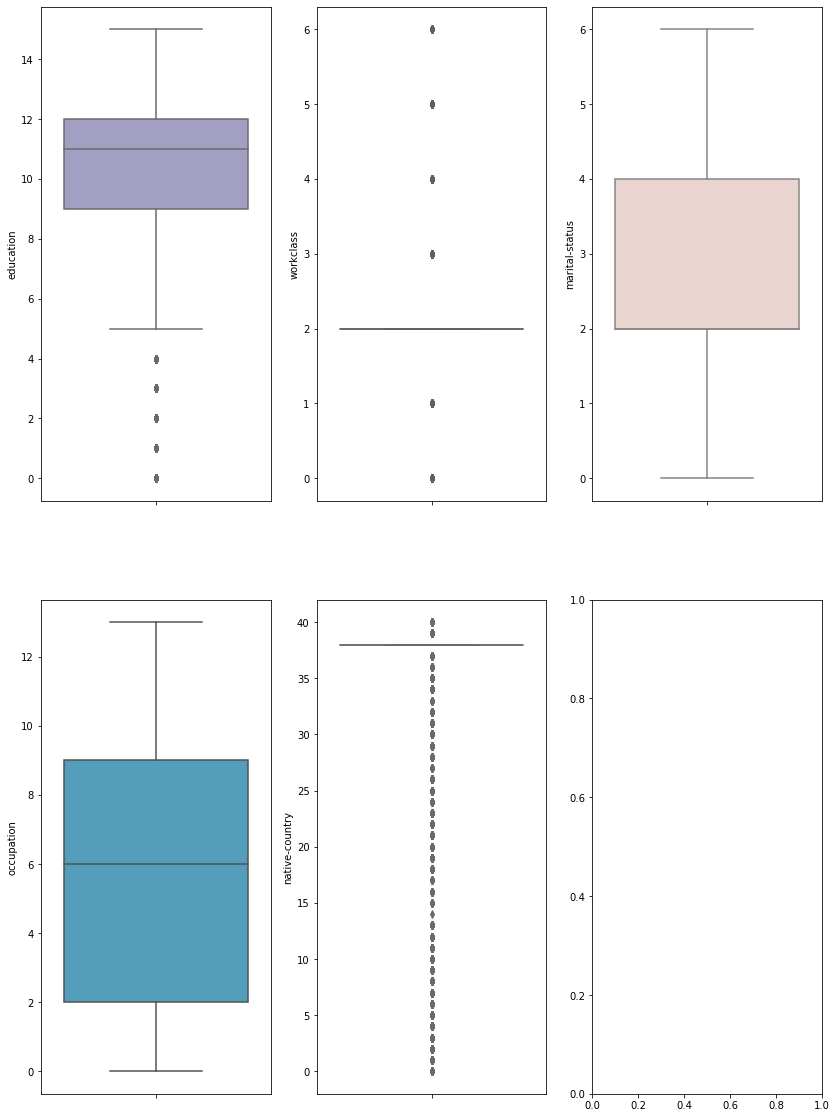

In [56]:
# Boxplots - Visualizar anomalias. Cuartiles, y cuales e salen de los rangos
f, ax = plt.subplots(2, 3, figsize=(14,20))

#Usando "x" daba problema
sns.boxplot(y= "workclass", data=dataset_mat, orient='v' , ax=ax[0][1], palette="Blues") 
sns.boxplot(y= "education", data=dataset_mat, orient='v' , ax=ax[0][0], palette="Purples") 
sns.boxplot(y= "marital-status", data=dataset_mat, orient='v' , ax=ax[0][2], palette=sns.cubehelix_palette(8)) 
sns.boxplot(y= "occupation", data=dataset_mat, orient='v' , ax=ax[1][0], palette="GnBu_d") 
sns.boxplot(y= "native-country", data=dataset_mat, orient='v' , ax=ax[1][1], palette="Purples") 
#Estos graficos me permiten identicar las anomalias, aquellos puntos que quedan fuera del gráfico.

# EDA (bivariante)

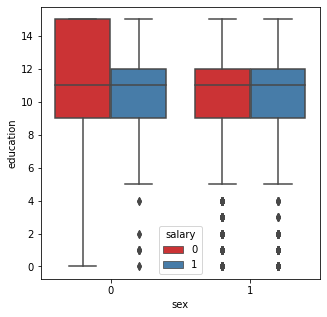

In [57]:
# Boxplot de dos categorias
f,ax = plt.subplots(figsize=(5,5)) 
sns.boxplot(x="sex",y="education", hue="salary",data=dataset_mat, palette="Set1") 
plt.show()

In [58]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [59]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "marital-status","occupation"

# Influencia workclass
x = dataset_mat['workclass']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de tipo de trabajo en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de tipo de trabajo en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0924  0.001 -0.1419  -0.043   True
     0      2  -0.1683  0.001 -0.2101 -0.1264   True
     0      3   0.1716  0.001  0.1155  0.2277   True
     0      4  -0.1013  0.001 -0.1494 -0.0533   True
     0      5  -0.1181  0.001 -0.1721 -0.0641   True
     0      6  -0.3871 0.0133 -0.7257 -0.0484   True
     1      2  -0.0758  0.001 -0.1048 -0.0469   True
     1      3    0.264  0.001  0.2167  0.3113   True
     1      4  -0.0089    0.9 -0.0463  0.0285  False
     1      5  -0.0257  0.605 -0.0704  0.0191  False
     1      6  -0.2946 0.1332  -0.632  0.0427  False
     2      3   0.3399  0.001  0.3006  0.3792   True
     2      4   0.0669  0.001  0.0404  0.0935   True
     2      5   0.0502  0.001   0.014  0.0863   True
     2      6  -0.2188 0.4696 -0.5551  0.1175  Fal

In [60]:
# Cuales pueden influir en el tipo de salario.

# Influencia de eduaction
x = dataset_mat['education']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de educación en tipo de salario")
print (Results)

Influencia de educación en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0157    0.9 -0.0799  0.0486  False
     0      2    0.005    0.9 -0.0808  0.0907  False
     0      3  -0.0322    0.9 -0.1543  0.0898  False
     0      4  -0.0303    0.9 -0.1247  0.0641  False
     0      5  -0.0091    0.9 -0.0848  0.0666  False
     0      6   -0.017    0.9 -0.0976  0.0636  False
     0      7    0.182  0.001  0.1172  0.2468   True
     0      8   0.1912  0.001  0.1298  0.2527   True
     0      9   0.3495  0.001  0.2976  0.4014   True
     0     10   0.6747  0.001  0.5888  0.7606   True
     0     11   0.0924  0.001  0.0423  0.1425   True
     0     12   0.4923  0.001  0.4332  0.5513   True
     0     13   -0.072    0.9  -0.283  0.1391  False
     0     14   0.6771  0.001  0.6008  0.7534   True
     0     15   0.1281  0.001  0.0771  0.1791   True
   

In [61]:
# Cuales pueden influir en el tipo de salario.

# Influencia marital-status
x = dataset_mat['marital-status']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de marital-status en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de marital-status en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.3689  0.001  0.1196  0.6183   True
     0      2   0.3477  0.001  0.3277  0.3677   True
     0      3  -0.0235    0.9 -0.0853  0.0383  False
     0      4  -0.0589  0.001   -0.08 -0.0379   True
     0      5   -0.037 0.1114 -0.0781  0.0042  False
     0      6  -0.0105    0.9 -0.0539  0.0328  False
     1      2  -0.0212    0.9 -0.2701  0.2277  False
     1      3  -0.3924  0.001 -0.6481 -0.1367   True
     1      4  -0.4279  0.001 -0.6768 -0.1789   True
     1      5  -0.4059  0.001 -0.6574 -0.1544   True
     1      6  -0.3795  0.001 -0.6313 -0.1276   True
     2      3  -0.3712  0.001 -0.4312 -0.3111   True
     2      4  -0.4066  0.001 -0.4217 -0.3916   True
     2      5  -0.3847  0.001 -0.4231 -0.3463   True
     2      6  -0.3582  0.001  -0.399 -0.3174   Tru

In [62]:
# Cuales pueden influir en el tipo de salario.
# 'workclass', "education", "education-num", "marital-status","occupation","relationship","race"

# Influencia occupation
x = dataset_mat['occupation']
y = dataset_mat['salary']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia de occupation en tipo de salario")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

Influencia de occupation en tipo de salario
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0227    0.9 -0.4763  0.4308  False
     0      2   0.0915  0.001  0.0606  0.1224   True
     0      3   0.3514  0.001  0.3204  0.3824   True
     0      4  -0.0176    0.9 -0.0662  0.0311  False
     0      5  -0.0724  0.001 -0.1155 -0.0292   True
     0      6  -0.0092    0.9 -0.0471  0.0287  False
     0      7  -0.0927  0.001 -0.1255   -0.06   True
     0      8  -0.1268 0.0171 -0.2427  -0.011   True
     0      9   0.3147  0.001  0.2838  0.3455   True
     0     10   0.1923  0.001  0.1342  0.2503   True
     0     11   0.1368  0.001   0.105  0.1686   True
     0     12    0.171  0.001  0.1208  0.2212   True
     0     13   0.0691  0.001  0.0282    0.11   True
     1      2   0.1142    0.9 -0.3393  0.5677  False
     1      3   0.3741 0.2414 -0.0794  0.8276  False
  

# 4. Selección de variables para el modelo

In [63]:
# Las que influyan en el tipo de salario.
# Numericas y categoricas ordinales sin influyen en la calificación final o salida
# Se tomara las multiclase, porque parece  influir.
#'sex',

# seleccionar automaticamente las variables. Se pudo haber hecho manual. #,
list_cat_corrs = ['age','workclass', 'education', 'marital-status', 'occupation',
                   'hours-per-week', 'native-country', 'salary'] 
df_ordinal = dataset_mat[list_cat_corrs].corr()['salary'].reset_index().rename(columns={'index':'variable'})
df_ordinal = df_ordinal[~df_ordinal['variable'].isin(['salary'])] # El rabo de chancho niega, como un not
#df_ordinal = df_ordinal[abs(df_ordinal['salary'])>0.21]  # Variables que tenga correlación significativamente alta > 0.21
df_ordinal
list_ordinal_chosen = list(df_ordinal['variable'].values)
list_ordinal_chosen

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'hours-per-week',
 'native-country']

In [64]:
# seleccionar las variables binarias
df_binary = pd.DataFrame()
list_binary = ['sex']

# Se itera pr las columnas, obteniendo el contraste de hipotesis con salary y solo nos quedaremos con aquellas que rechacen la 
# hipotesis nula. Que este debajo del umbral Threshold

threshold = 0.05

for column in list_binary:
    pvalue = stats.f_oneway(dataset_mat[dataset_mat[column]==0]["salary"],
                           dataset_mat[dataset_mat[column]==1]["salary"])[1] #Segunda posición de la lista el pvalue
    
    df_binary = df_binary.append(pd.DataFrame({'variable':[column],
                                              'pvalue':[pvalue]}))
    
df_binary = df_binary[df_binary['pvalue']<=threshold]
list_binary_chosen = list(df_binary['variable'].values)
    
df_binary
list_binary_chosen

['sex']

In [65]:
# Unimos las variables elegidas
list_all_chosen = list_ordinal_chosen + list_binary_chosen 
list_all_chosen

['age',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'hours-per-week',
 'native-country',
 'sex']

# 5. Construcción del modelo

In [66]:
df_mat = dataset_mat[list_all_chosen + ['salary']] # salary es la variable de salida.. A predecir
#df_mat.head()
df_test = dataset_test[list_all_chosen + ['salary']] # salary es la variable de salida.. A predecir
#df_test.head()

In [67]:
# onehot encoding, para representar los variables categoricaas. La categoria maxima se representa con max-1 ceros
# Recuerden que son max categorias. con la combinación de un 1 en la posición, se le da al valor.
aux = pd.get_dummies(df_mat['workclass'], drop_first = True) #
aux.columns = ['workclass_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['workclass']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['education'], drop_first = True) #
aux.columns = ['education_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['education']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['marital-status'], drop_first = True) #
aux.columns = ['marital-status_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['marital-status']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['occupation'], drop_first = True) #
aux.columns = ['occupation_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['occupation']) # Se descarta la columna original
aux = pd.get_dummies(df_mat['native-country'], drop_first = True) #
aux.columns = ['native-country_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_mat = df_mat.join(aux, how="inner").drop(columns=['native-country']) # Se descarta la columna original
#df_mat.head()

aux = pd.get_dummies(df_test['workclass'], drop_first = True) #
aux.columns = ['workclass_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['workclass']) # Se descarta la columna original
aux = pd.get_dummies(df_test['education'], drop_first = True) #
aux.columns = ['education_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['education']) # Se descarta la columna original
aux = pd.get_dummies(df_test['marital-status'], drop_first = True) #
aux.columns = ['marital-status_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['marital-status']) # Se descarta la columna original
aux = pd.get_dummies(df_test['occupation'], drop_first = True) #
aux.columns = ['occupation_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['occupation']) # Se descarta la columna original
aux = pd.get_dummies(df_test['native-country'], drop_first = True) #
aux.columns = ['native-country_' + str(col) for col in list(aux.columns)] #Concatene un sufijo al nombre de la columna de aux
df_test = df_test.join(aux, how="inner").drop(columns=['native-country']) # Se descarta la columna original
#df_mat.head()

In [68]:
# Normalizado o Escalado de las variables numerales ordinales, las pone en valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

list_ordinal = ['age','hours-per-week']
scaler = MinMaxScaler()
df_mat[list_ordinal] = scaler.fit_transform(df_mat[list_ordinal]) # devuelve los valores transformados
#df_mat.head()

df_test[list_ordinal] = scaler.fit_transform(df_test[list_ordinal]) # devuelve los valores transformados
#df_test.head()

In [69]:
# Separacion en variables entrada/salida
X = df_mat.drop(columns=["salary"]).values
y = df_mat["salary"].values
Xt = df_test.drop(columns=["salary"]).values
yt = df_test["salary"].values

In [70]:
# Train/Test Split
# Con los datos del archivo de train
# Con datos de prueba del archivo de train aleatorios
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [71]:
#SVM (Kernel = rbf)
from sklearn.svm import SVC
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Filtered
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[6924  627]
 [1118 1385]]
precision: 0.6883697813121272  recall: 0.5533359968038354  f1: 0.6135105204872646


In [72]:
# Train/Test Split
# Con los datos del archivo de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt,yt) 

In [73]:
#SVM (Kernel = rbf)
from sklearn.svm import SVC
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Filtered
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("precision:", precision, " recall:", recall, " f1:", f1)

[[2659  202]
 [ 453  451]]
precision: 0.6906584992343032  recall: 0.49889380530973454  f1: 0.5793192035966603


# Con otros algoritmos

# Gaussian Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [75]:
# Binary data
GNB.fit(X_train,y_train)
train_score = GNB.score(X_train,y_train)
test_score = GNB.score(X_test,y_test)
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')

Gaussian Naive Bayes : Training score - 0.38556883576803896 - Test score - 0.3755644090305445


# LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression
logClassifier = LogisticRegression(solver='lbfgs', max_iter=500)

In [83]:
logClassifier.fit(X_train,y_train)
train_score = logClassifier.score(X_train,y_train)
test_score = logClassifier.score(X_test,y_test)
print(f'LogisticRegression : Training score - {train_score} - Test score - {test_score}')

LogisticRegression : Training score - 0.830987162461266 - Test score - 0.8316069057104913


# KNN Neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier

KNN : Training score - 0.9744134572819831 -- Test score - 0.7814077025232403
KNN : Training score - 0.8818946436476317 -- Test score - 0.8079681274900399
KNN : Training score - 0.8617087206728641 -- Test score - 0.8127490039840638
KNN : Training score - 0.8534749889331562 -- Test score - 0.8143426294820717
KNN : Training score - 0.8489597166888003 -- Test score - 0.8124833997343958
KNN : Training score - 0.8446215139442231 -- Test score - 0.8167330677290837
KNN : Training score - 0.8430278884462151 -- Test score - 0.8156706507304117
KNN : Training score - 0.8408145196989818 -- Test score - 0.8148738379814077
KNN : Training score - 0.8394864984506418 -- Test score - 0.8172642762284197
KNN : Training score - 0.8380699424524126 -- Test score - 0.8167330677290837


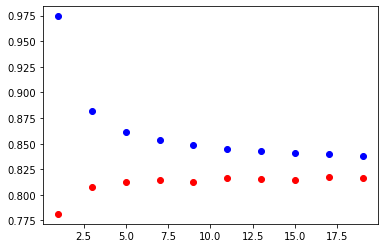

In [85]:
train_scores = []
test_scores = []

for n in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN : Training score - {train_score} -- Test score - {test_score}')
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn.score(X_train,y_train)

train_score = knn.score(X_train,y_train)
test_score = knn.score(X_test,y_test)

print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')

K Neighbors : Training score - 0.8617087206728641 - Test score - 0.8127490039840638


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rndTree = RandomForestClassifier()

In [89]:
rndTree.fit(X_train,y_train)

RandomForestClassifier()

In [90]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [91]:
train_score = rndTree.score(X_train,y_train)
test_score = rndTree.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} - Test score - {test_score}')

Random Forests : Training score - 0.9770694997786631 - Test score - 0.8098273572377158
